<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Модель-логистическая-регрессия" data-toc-modified-id="Модель-логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель логистическая регрессия</a></span></li><li><span><a href="#Модель-случайный-лес" data-toc-modified-id="Модель-случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель случайный лес</a></span></li><li><span><a href="#Модель-дерево-решений" data-toc-modified-id="Модель-дерево-решений-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель дерево решений</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools 

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split                                     
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_recall_curve,
                            roc_curve, 
                            auc, 
                            roc_auc_score,
                            f1_score,
                            accuracy_score

## Подготовка данных

In [ ]:
data = pd.read_csv('/datasets/Churn.csv')

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Столбец RowNumber показывает номера строк, но по умолчанию у нас уже есть такой столбец, поэтому можно удалить его. Также удалим столбец с фамилиями, так как при дальнейшей стандартизации данных он будет очень мешать.

In [ ]:
data = data.drop(['RowNumber','Surname','CustomerId'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [ ]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.isna().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

В столбце Tenure большое количество пропущенных значений, этот столбец обозначает сколько лет человек является клиентом банка. Заполним пропуски медианным значением для дальнейшей работы с этим столбцом.

In [ ]:
data.loc[data['Tenure'].isna(), 'Tenure'] = data['Tenure'].median()

Данные готовы к дальнейшему делению и подготовке к исследованию. Таблица состоит из 10000 строк и 13 колонок. Все пропуски устранены. Целевой признак Exited — факт ухода клиента находится в последнем столбце.

## Исследование задачи

Сначала нужно преобразовать категорийные признаки в численные. Сделаем это с помощью прямого кодирования OHE.

In [ ]:
data = pd.get_dummies(data, drop_first=True)

Теперь масштабируем признаки с помощью метода стандартизации StandardScaler. 

In [ ]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


Теперь выделим целевой признак (ушел клиент или нет) в отдельный датасет y. Далее разделим каждый из этих датасетов на выборки: тренировочную, валидационную и тестовую.

In [ ]:
X = data.drop(['Exited'], axis=1) # все данные
y = data['Exited'] # целевой признак

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=12345)
# делим каждый из датасетов на 60% тренировочных и 40% валидационных
X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, test_size=0.5, random_state=12345)
# 40% валидационных данных делим пополам на валидационные и тестовые

In [ ]:
print(f'Обучающие данные:{X_train.shape[0]}\nВалидационные: {X_valid.shape[0]}\nТестовые: {X_test.shape[0]}')
print()
print(f'Обучающие данные:{y_train.shape[0]}\nВалидационные: {y_valid.shape[0]}\nТестовые: {y_test.shape[0]}')

Обучающие данные:6000
Валидационные: 2000
Тестовые: 2000

Обучающие данные:6000
Валидационные: 2000
Тестовые: 2000


In [ ]:
scaler = StandardScaler()
numeric = ['CreditScore', 'Age','Tenure', 'Balance','NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary'] # список всех численных признаков 
scaler.fit(data[numeric])
data[numeric] = scaler.transform(data[numeric])

На данном этапе мы преобразовали категорийные значения в численные, масштабировали их методом стандартизации и поделили полученный датасет на обучающие, валидационные и тестовые выборки.

### Модель логистическая регрессия

In [ ]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.13441955193482688


### Модель случайный лес

In [ ]:
model = RandomForestClassifier(random_state=12345)
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.5481927710843374


### Модель дерево решений

In [ ]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(X_train, y_train)
predicted_valid = model.predict(X_valid)
print("F1:", f1_score(y_valid, predicted_valid))

F1: 0.47863247863247865


При исследовании трех моделей со стандартными параметрами значение F1 получилось выше в случае модели **случайного леса**, поэтому для дальнейшего исследования лучше изучать поведение именно этой модели.

## Борьба с дисбалансом

Попробуем подобрать оптимальные значения параметра глубины и количества деревьев для модели Случайного леса, с импользованием параметра class_weight='balanced'. 

In [ ]:
for depth,estimator in itertools.product(range(1,30,10), range(1,151,50)):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=estimator, class_weight='balanced')
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    F1 = f1_score(y_valid, predictions)
    print('Depth: {: >5.0f}       |   Estimators: {:>5.0f}'.format(depth, estimator))
    print('F1: {: >5.4f}'.format(F1))
    print('------------------------------------------------------')

Depth:     1       |   Estimators:     1
F1: 0.2177
------------------------------------------------------
Depth:     1       |   Estimators:    51
F1: 0.5187
------------------------------------------------------
Depth:     1       |   Estimators:   101
F1: 0.5232
------------------------------------------------------
Depth:    11       |   Estimators:     1
F1: 0.5005
------------------------------------------------------
Depth:    11       |   Estimators:    51
F1: 0.5945
------------------------------------------------------
Depth:    11       |   Estimators:   101
F1: 0.6020
------------------------------------------------------
Depth:    21       |   Estimators:     1
F1: 0.4793
------------------------------------------------------
Depth:    21       |   Estimators:    51
F1: 0.5145
------------------------------------------------------
Depth:    21       |   Estimators:   101
F1: 0.5116
------------------------------------------------------


Таким образом наилучший показатель F1 меры равен 0.6058 и его удалось достичь при глубине 11 и количестве деревьев 51. Посмотрим насколько выборка не сбалансирована:

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:ylabel='Exited'>

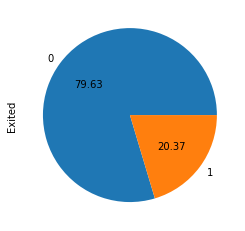

In [ ]:
y.value_counts().plot.pie(autopct='%.2f')

Для того, чтобы сбалансировать данную выборку можно увеличить выборку "1", либо уменьшить выборку "0". Попробуем сначала увеличить выборку при помощи техники upsampling.

In [ ]:
def upsample(X, y, repeat):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)
    
    X_upsampled, y_upsampled = shuffle(
        X_upsampled, y_upsampled, random_state=12345)
 
    return X_upsampled, y_upsampled

for repeat in range(1,10,1):
    X_upsampled, y_upsampled = upsample(X_train, y_train, repeat)

    model = RandomForestClassifier(random_state=12345)
    model.fit(X_upsampled, y_upsampled)
    predicted_valid = model.predict(X_valid)
    print("F1: {: >5.3f}  |   Repeats: {: >5.0f}".format(f1_score(y_valid, predicted_valid),repeat))

F1: 0.546  |   Repeats:     1
F1: 0.580  |   Repeats:     2
F1: 0.594  |   Repeats:     3
F1: 0.591  |   Repeats:     4
F1: 0.590  |   Repeats:     5
F1: 0.605  |   Repeats:     6
F1: 0.586  |   Repeats:     7
F1: 0.567  |   Repeats:     8
F1: 0.584  |   Repeats:     9


In [ ]:
X_train_up, y_train_up = upsample(X_train, y_train, 4)
y_train_up.value_counts(normalize=True)

0    0.501043
1    0.498957
Name: Exited, dtype: float64

<AxesSubplot:>

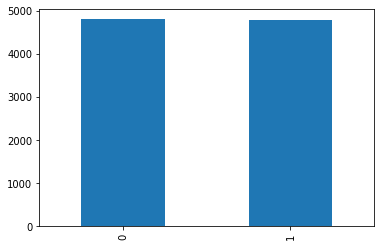

In [ ]:
y_train_up.value_counts().plot(kind='bar')

In [ ]:
best_result = 0
for est in range(10, 51, 10):
    for depth in range(1, 6):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(X_train_up, y_train_up)
        predicted_valid_up = model.predict(X_valid)
        f1 = f1_score(y_valid, predicted_valid_up)
        if f1 > best_result:
            best_result = f1 

print("F1 наилучшей модели на валидационной выборке:", best_result)

F1 наилучшей модели на валидационной выборке: 0.5900681596884129


Итак, теперь классы почти равны. Получается лучший показатель F1 = 0.604, при увеличении выборки мера практически не поменялась. Теперь попробуем уменьшить выборку техникой downsampling.

In [ ]:
def downsample(X, y, fraction):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    X_downsampled = pd.concat(
        [X_zeros.sample(frac=fraction, random_state=12345)] + [X_ones])
    y_downsampled = pd.concat(
        [y_zeros.sample(frac=fraction, random_state=12345)] + [y_ones])
    
    X_downsampled, y_downsampled = shuffle(
        X_downsampled, y_downsampled, random_state=12345)
    
    return X_downsampled, y_downsampled

for i in np.arange(0.03, 0.31, 0.03):
    X_downsampled, y_downsampled = downsample(X_train, y_train, i)
    model = RandomForestClassifier(random_state=12345)
    model.fit(X_downsampled, y_downsampled)
    predicted_valid = model.predict(X_valid)
    print("F1: {: >5.3f}  |  Fractions : {: >5.3f}".format(f1_score(y_valid, predicted_valid), i))

F1: 0.372  |  Fractions : 0.030
F1: 0.427  |  Fractions : 0.060
F1: 0.477  |  Fractions : 0.090
F1: 0.521  |  Fractions : 0.120
F1: 0.540  |  Fractions : 0.150
F1: 0.545  |  Fractions : 0.180
F1: 0.559  |  Fractions : 0.210
F1: 0.565  |  Fractions : 0.240
F1: 0.590  |  Fractions : 0.270
F1: 0.592  |  Fractions : 0.300


In [ ]:
X_train_down, y_train_down = downsample(X_train, y_train, 0.3)
y_train_down.value_counts(normalize=True)

0    0.546454
1    0.453546
Name: Exited, dtype: float64

<AxesSubplot:>

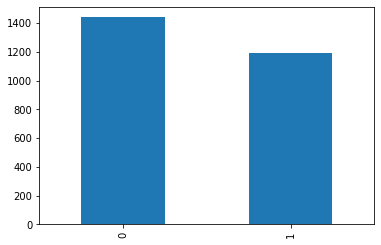

In [ ]:
y_train_down.value_counts().plot(kind='bar')

При уменьшении выборки показатель F1 меры даже немного ухудшился, но выборки практически сбалансировались. С помощью этих техник улучшения показателей достичь не удалось.

**Вывод:**
таким образом лучшее значение F1, которого удалось достичь **0.60** у модели **Случайный лес** при подборе параметров с глубиной 11 и количеством деревьев равным 51. При балансе 1 к 1 качество модели становится еще хуже, поэтому на графиках представлен наиболее оптимальный вариант. Улучшить модель путем увеличения и уменьшения выборок не удалось.

## Тестирование модели

Построим график кривой Precision-Recall модели случайного леса с наилучшими показателями.

Valid F1: 0.5944584382871537
Test F1: 0.6136363636363636


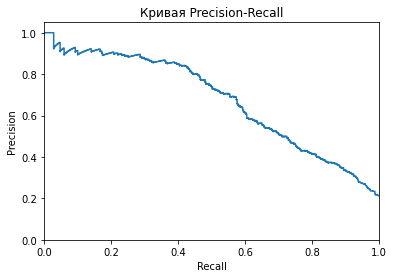

In [ ]:
model = RandomForestClassifier(random_state=12345, 
                               class_weight='balanced',
                               n_estimators = 51, 
                               max_depth=11)
model.fit(X_train, y_train)

predicted_valid = model.predict(X_valid)
print('Valid F1:', f1_score(y_valid, predicted_valid))

predicted_test = model.predict(X_test)
print('Test F1:', f1_score(y_test, predicted_test))

probabilities_test = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, probabilities_test[:, 1])

plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show()

На тестовой выборке показатель F1 равен 0.61.
Теперь построим ROC-кривую для случайного леса с лучшим результатом F1. По горизонтали доля ложноположительных ответов (FPR), а по вертикали — доля истинно положительных ответов (TPR).Проведём ROC-кривая, или кривую ошибок. У случайной модели она выглядит как прямая линия, построим также ее для более наглядного сравнения.  

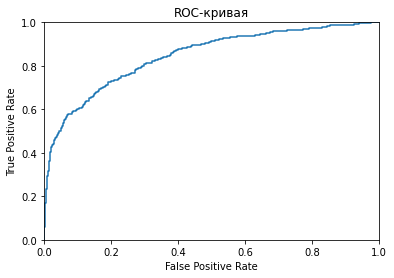

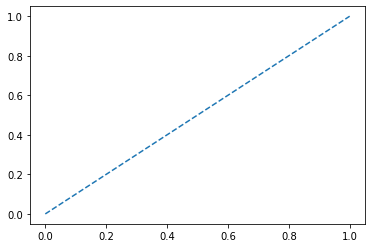

In [ ]:
model = RandomForestClassifier(random_state=12345, 
                               class_weight='balanced',
                               n_estimators = 51, 
                               max_depth=11)
model.fit(X_train, y_train)

probabilities_test = model.predict_proba(X_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


plt.plot([0, 1], [0, 1], linestyle='--')


Теперь посчитаем площадь под ROC-кривой — AUC-ROC.

In [ ]:
model = RandomForestClassifier(random_state=12345, 
                               class_weight='balanced',
                               n_estimators = 51, 
                               max_depth=11)
model.fit(X_train, y_train)
predicted_test = model.predict(X_test)

probabilities_test = model.predict_proba(X_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(y_test, probabilities_one_test)

print(auc_roc)

0.8446594160380838


AUC-ROC это метрика качества, которая в данном случае получилась равной 0.84, что является хорошим результатом, так как значительно выше порога.

# Общий вывод
* Для прогнозирования оттока клиентов предварительно были протестированы три модели машинного обучения со стандартными параметрами: Логистическая регрессия, Случайный лес и Дерево решений. 
* Наилучший результат значения F1-меры показала модель Случайного леса, поэтому дальнейшие исследования были проведены с ней.
* При подборе оптимальной глубины леса (11) и количества деревьев (51) получилось достичь значения F1 = 0.61.
* Использование техник увеличения и уменьшения выборок не улучшило показатель F1 меры.
* Построен график кривой Precision-Recall.
* Построен график кривой ROC и получено значение AUC-ROC наилучшей модели равное 0.84, что значительно выше порога. 